In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as st



In [3]:
data_frame=pd.read_csv('dog_rates_tweets.csv',parse_dates=['created_at']).set_index(['id'])
def search_data(x):
    obj = re.search(r'(\d+(\.\d+)?)/10',x)
    if obj:
        return float(obj.group(1))
    else:
        return None

In [4]:
new_frame_function = np.vectorize(search_data,otypes=[np.float_])

In [5]:
new_frame = new_frame_function(data_frame['text'])

In [6]:
data_frame['rate'] = new_frame

In [7]:
data = data_frame[data_frame['rate'].notnull()]

In [8]:
data = data[data['rate'] <= 25]


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


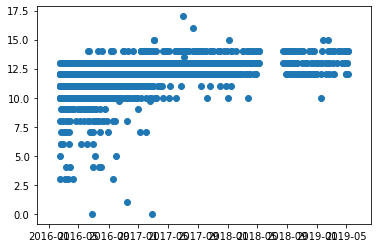

In [8]:
plt.scatter(data['created_at'],data['rate'])


In [9]:
def transfer(x):
    return x.timestamp()
to_timestamp = np.vectorize(transfer,otypes=[np.double])

data['timestamp'] = data['created_at'].apply(to_timestamp)

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


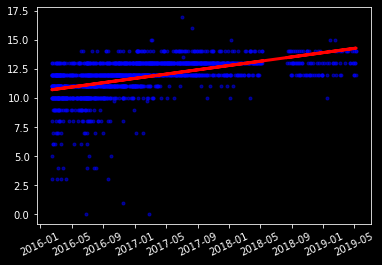

In [11]:
fit = st.linregress(data['timestamp'],data['rate'])
plt.xticks(rotation=25)
plt.plot(data['created_at'],data['rate'], 'b.', alpha=0.5)
plt.plot(data['created_at'],data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)

1.5139606492959894e-106


Text(0.5, 0, 'residual')

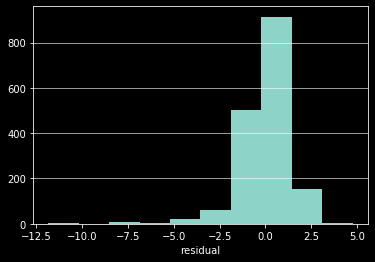

In [12]:
print(fit.pvalue)
plt.hist(data['rate']-(data['timestamp']*fit.slope + fit.intercept))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('residual')